Rebalancing for period: 1999-11-08 00:00:00 to 2000-01-31 00:00:00
Momentum scores:
SPY   NaN
IEF   NaN
TLT   NaN
GLD   NaN
DBC   NaN
dtype: float64
Selected symbols based on momentum: Index(['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], dtype='object')
Volatilities:
SPY    0.021595
IEF         NaN
TLT         NaN
GLD         NaN
DBC         NaN
dtype: float64
Amounts to invest:
SPY    50000.0
IEF        NaN
TLT        NaN
GLD        NaN
DBC        NaN
dtype: float64
Shares to buy:
SPY    543.81929
IEF          NaN
TLT          NaN
GLD          NaN
DBC          NaN
dtype: float64
Portfolio value at end of period: 50612.924094311704
Rebalancing for period: 2000-01-31 00:00:00 to 2000-04-24 00:00:00
Momentum scores:
SPY   NaN
IEF   NaN
TLT   NaN
GLD   NaN
DBC   NaN
dtype: float64
Selected symbols based on momentum: Index(['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], dtype='object')
Volatilities:
SPY    0.019083
IEF         NaN
TLT         NaN
GLD         NaN
DBC         NaN
dtype: float64
Amounts to invest

Volatilities:
SPY    0.020782
IEF    0.005662
TLT    0.012639
GLD    0.011682
DBC    0.016188
dtype: float64
Amounts to invest:
SPY     5293.304597
IEF    19427.006716
TLT     8703.751392
GLD     9416.945824
DBC     6795.415248
dtype: float64
Shares to buy:
SPY     57.620192
IEF    269.957727
TLT    131.445678
GLD     86.904262
DBC    300.986485
dtype: float64
Portfolio value at end of period: 51369.9353852195
Rebalancing for period: 2010-06-07 00:00:00 to 2010-08-30 00:00:00
Momentum scores:
SPY   NaN
IEF   NaN
TLT   NaN
GLD   NaN
DBC   NaN
dtype: float64
Selected symbols based on momentum: Index(['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], dtype='object')
Volatilities:
SPY    0.010071
IEF    0.005345
TLT    0.011841
GLD    0.004569
DBC    0.009772
dtype: float64
Amounts to invest:
SPY     7371.095761
IEF    13887.403051
TLT     6268.919069
GLD    16246.219684
DBC     7596.297820
dtype: float64
Shares to buy:
SPY     87.481799
IEF    183.534582
TLT     85.902905
GLD    133.724748
DBC    367.2

Volatilities:
SPY    0.007554
IEF    0.002787
TLT    0.007117
GLD    0.005632
DBC    0.007292
dtype: float64
Amounts to invest:
SPY    10587.260158
IEF    28696.678618
TLT    11237.439224
GLD    14199.252553
DBC    10966.693603
dtype: float64
Shares to buy:
SPY     35.506807
IEF    265.345993
TLT     85.862414
GLD    103.598807
DBC    718.396303
dtype: float64
Portfolio value at end of period: 78306.88418301001
Rebalancing for period: 2020-02-03 00:00:00 to 2020-04-27 00:00:00
Momentum scores:
SPY   NaN
IEF   NaN
TLT   NaN
GLD   NaN
DBC   NaN
dtype: float64
Selected symbols based on momentum: Index(['SPY', 'IEF', 'TLT', 'GLD', 'DBC'], dtype='object')
Volatilities:
SPY    0.026491
IEF    0.003387
TLT    0.011120
GLD    0.014851
DBC    0.017422
dtype: float64
Amounts to invest:
SPY     5397.201164
IEF    42217.817326
TLT    12857.830520
GLD     9627.279102
DBC     8206.756070
dtype: float64
Shares to buy:
SPY     17.136181
IEF    377.014438
TLT     90.674854
GLD     64.891339
DBC    573.

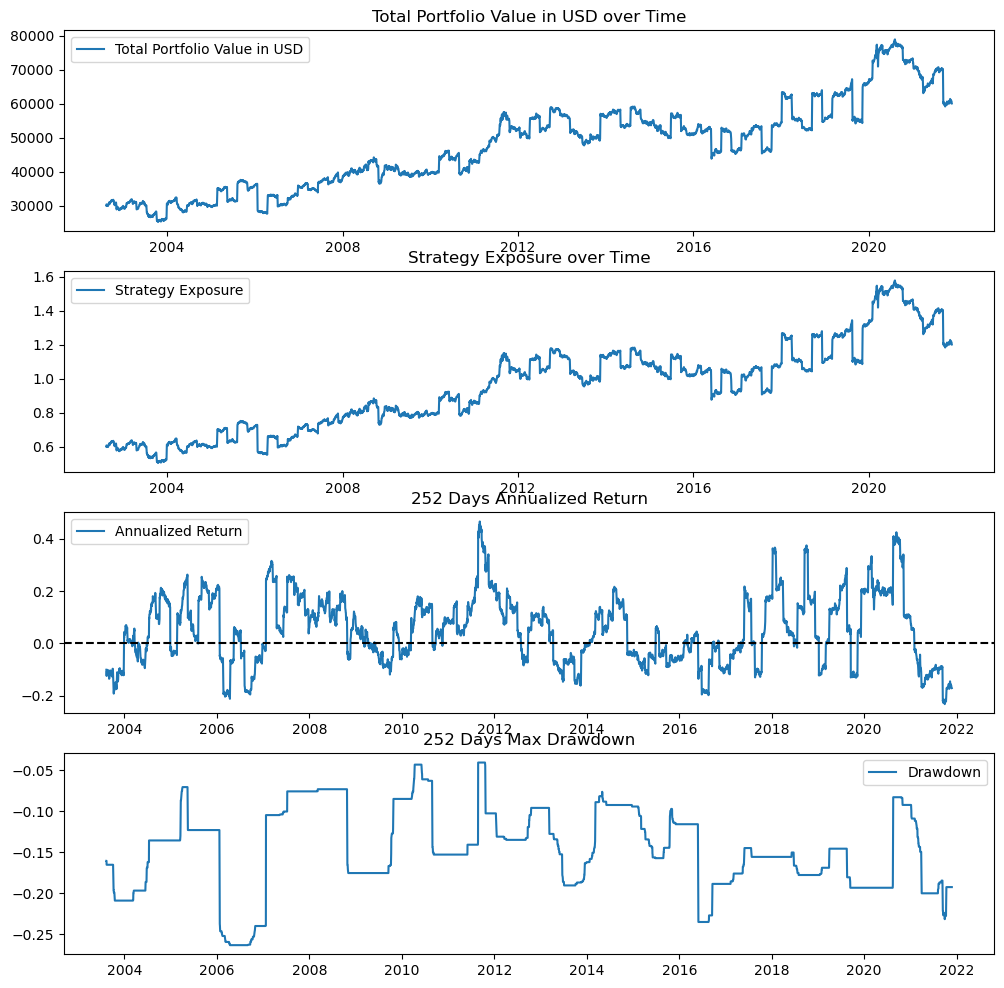

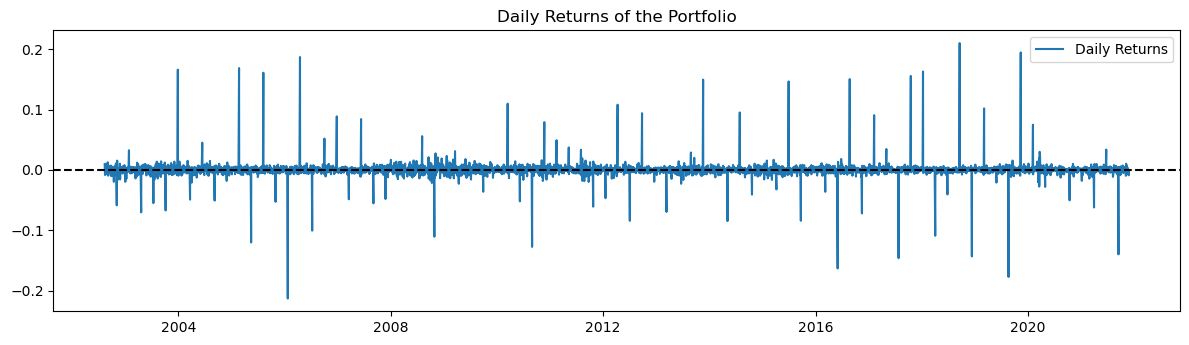

Latest Annualized Return: -17.06%
Maximum Drawdown: -26.34%


In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

file_path = 'ETF_price.csv'
df = pd.read_csv(file_path, parse_dates=['date'])
df.set_index('date', inplace=True)

df.fillna(method='ffill', inplace=True)

initial_portfolio = 50000
momentum_window = 125
vola_window = 20
portfolio_size = 5 

def momentum_score(ts):
    if len(ts.dropna()) >= momentum_window:
        x = np.arange(len(ts))
        log_ts = np.log(ts)
        slope, _, r_value, _, _ = stats.linregress(x, log_ts)
        annualized_slope = (np.power(np.exp(slope), 252) - 1) * 100
        score = annualized_slope * (r_value ** 2)
        return score
    else:
        return np.nan

def volatility(ts):
    if len(ts.dropna()) > vola_window:
        return ts.pct_change().rolling(vola_window).std().iloc[-1]
    else:
        return np.nan
    
def ann_ret(portfolio_values):
    if portfolio_values[0] == 0:
        return np.nan 
    total_return = portfolio_values[-1] / portfolio_values[0] - 1
    annualized_return = (1 + total_return) ** (252 / len(portfolio_values)) - 1
    return annualized_return

def dd(portfolio_values):
    peak = portfolio_values.expanding(min_periods=1).max()
    drawdown = (portfolio_values / peak) - 1
    return drawdown.min()

# Rebalancing Logic
rebalance_period = '12W'
rebalance_dates = pd.date_range(df.index.min(), df.index.max(), freq=rebalance_period)

portfolio = pd.DataFrame(index=df.index, columns=df.columns[1:])
portfolio.fillna(0, inplace=True) 

cash = initial_portfolio
for start_date in rebalance_dates:
    if start_date not in df.index:
        start_date = df.index[df.index.searchsorted(start_date)]

    end_date = start_date + pd.DateOffset(weeks=12)
    
    if end_date not in df.index:
        end_date = df.index[df.index.searchsorted(end_date) - 1]
    end_date = min(end_date, df.index[-1])  
    
    print(f"Rebalancing for period: {start_date} to {end_date}")
    
    period_data = df.loc[start_date:end_date]

    # Calculate momentum scores
    momentum_scores = period_data.apply(lambda x: momentum_score(x.tail(momentum_window)))
    print(f"Momentum scores:\n{momentum_scores}")

    # Select top N ETFs based on momentum scores
    selected_symbols = momentum_scores.nlargest(portfolio_size).index
    print(f"Selected symbols based on momentum: {selected_symbols}")

    # Apply the investment strategy on the selected symbols
    volatilities = period_data[selected_symbols].apply(volatility)
    print(f"Volatilities:\n{volatilities}")
    
    inv_vola = 1 / volatilities
    weights = inv_vola / inv_vola.sum()
    
    amounts_to_invest = weights * cash
    print(f"Amounts to invest:\n{amounts_to_invest}")
    
    shares_to_buy = amounts_to_invest / period_data[selected_symbols].iloc[0]
    print(f"Shares to buy:\n{shares_to_buy}")

    if not shares_to_buy.replace([np.inf, -np.inf], np.nan).dropna().empty:
        for symbol in selected_symbols:
        # Round down to the nearest integer for the number of shares
            portfolio.loc[start_date:end_date, symbol] = np.floor(shares_to_buy[symbol])
    
        end_period_prices = df.loc[end_date, selected_symbols]
        period_portfolio_value = (portfolio.loc[end_date, selected_symbols] * end_period_prices).sum()
        cash = period_portfolio_value  # All cash is reinvested
    else:
        print("Warning: No shares were bought due to NaN or infinite values in 'shares_to_buy'.")
        continue

    print(f"Portfolio value at end of period: {cash}")

portfolio_value = (portfolio * df[df.columns[1:]]).sum(axis=1)

portfolio_annualized_return = ann_ret(portfolio_value)
portfolio_max_drawdown = dd(portfolio_value)

if portfolio_value[0] == 0:
    portfolio_value = portfolio_value[portfolio_value != 0]

plt.figure(figsize=(12, 12))

if not portfolio_value.empty:
    plt.subplot(4, 1, 1)
    plt.plot(portfolio_value.index, portfolio_value, label='Total Portfolio Value in USD')
    plt.title('Total Portfolio Value in USD over Time')
    plt.legend()

    plt.subplot(4, 1, 2)
    exposure = portfolio_value / initial_portfolio
    plt.plot(exposure.index, exposure, label='Strategy Exposure')
    plt.title('Strategy Exposure over Time')
    plt.legend()

    plt.subplot(4, 1, 3)
    rolling_annualized_return = portfolio_value.rolling(window=252).apply(ann_ret)
    plt.plot(rolling_annualized_return.index, rolling_annualized_return, label='Annualized Return')
    plt.title('252 Days Annualized Return')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.legend()

    plt.subplot(4, 1, 4)
    rolling_drawdown = portfolio_value.rolling(window=252).apply(dd)
    plt.plot(rolling_drawdown.index, rolling_drawdown, label='Drawdown')
    plt.title('252 Days Max Drawdown')
    plt.legend()
    
    daily_returns = portfolio_value.pct_change()
    plt.figure(figsize=(12, 16))
    plt.subplot(5, 1, 5)
    plt.plot(daily_returns.index, daily_returns, label='Daily Returns')
    plt.title('Daily Returns of the Portfolio')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No portfolio values to plot.")

if not rolling_annualized_return.empty:
    print(f"Latest Annualized Return: {rolling_annualized_return.iloc[-1]:.2%}")
else:
    print("No data for annualized return calculation.")

if not rolling_drawdown.empty:
    print(f"Maximum Drawdown: {rolling_drawdown.min():.2%}")
else:
    print("No data for drawdown calculation.")
